You should be able to do this in the notebook! (if you selected the py5 kernel)

In [ ]:
!pip install -upgrade py5canvas

In [1]:
from py5canvas import *

# Abstraction and object-oriented programming (OOP)

Python is a high level programming language. It provides data types such as lists, and dictionaries, which hide away low level memory management and allow us to easily work with collections of data. In other words, the lower level procedures of how data is stored and accessed in memory are **abstracted away** from the programmer.

Functions, allow a programmer to define a procedure that can be reused multiple times without needing to rewrite the same code. This is also a form of abstraction: the details of how the function works are abstracted away from the user of the function. 

In the past classes, we have also seen examples of custom datatypes defined in external libraries. For instance, the `Image` datatype defined in the `PIL` imaging library  abstracts away the low level details of how images are stored and manipulated in memory. The NumPy `ndarray` abstracts away low level details of how multi-dimensional arrays are stored and manipulated in memory. This allows us for example to add two arrays together with a simple `+` operator, without having to loop over each element in the array.

How are these abstractions implemented in Python? This is done through the use of object oriented programming (OOP). OOP allows programmers to define custom datatypes, called classes, which define a "blueprint" for a datatype and can be used to create multiple instances of the datatype, called objects. 

**Understanding how objects work, will make it easier to use existing libraries, and also allow you to create your own abstractions in your code.**

##  Classes and objects

We have seen an example of class when creating a video input stream with Py5Canvas. In this specific case, the class is called `VideoInput` and it has been defined for you in the Py5Canvas library. We created a video input stream by **instantiating** the `VideoInput` class and using the class name as a function with some arguments. 

For example:
```python
vin = VideoInput(0, size=(640, 480))
```

This line of code creates an **object** (or instance) of the `VideoInput` class and assigns it to the variable `vin`. 

We then used the `vin` object to read frames from the video input stream using the "dot notation", i.e. using a function preceded by the object name and a dot:
```python
frame = vin.read()
```

The function `read()` is a **method** that has been defined in the `VideoInput` class, it abstracts the code necessary to read frames from  a video input stream. 

This leaves the user with a higher level interface and resulting in code that is easier to read and understand.

## Class definitions

A class is like a blueprint or a template for creating objects. 

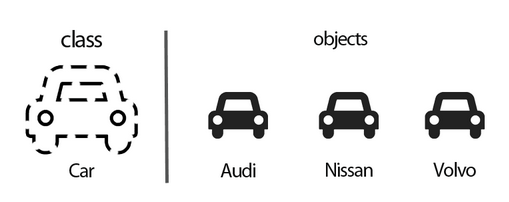

Imagine you’re creating a car driving video game. A class would be a good way to describe the car through its **attributes** (e.g. its color, its shape, its current and maximum speed etc..) and its **methods**, functionalities that an instance of the car can do (moving, turning, honking). 

These methods (functionalities) are valid for any car, whatever its specific attributes are. E.g. a green car and a blue car are both cars.

The attributes of the class define the specifics of a car when it is **instantiated** (created) as an object. 

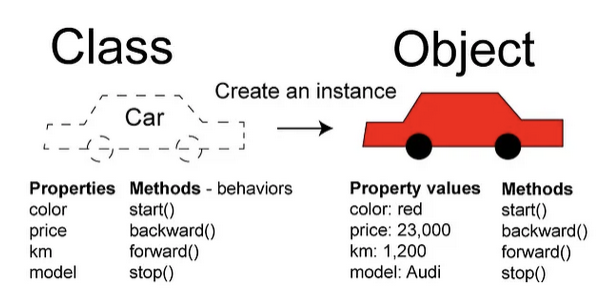

Instantiating a class is like buying/renting a car with specific attributes (color, maximum speed, size etc..). You can then use the functionalities that the car provides and these will adapt to the car's properties. 

Instantiation of a class is done using a special function called a **constructor**. It is written as a special function called `__init__` and it defines how a users of the class create object instances with specific attributes.

E.g. `car = Car(10, 10)` will create a "car" object and will initialize its attributes with the arguments of the `Car` function. These attributes will be stored in the object as **instance variables**

Let's see how this could done in practice:
```python
class Car:
    def __init__(self, x, y, color, max_speed=10):
        self.position = vector(x, y)
        self.color = color
        self.orientation = 0 # in degrees
        self.speed = 0.0
        self.max_speed = max_speed

    def accelerate(self, amount):
        self.speed += amount

    def move(self):
        theta = radians(self.orientation)
        self.position += vector(cos(theta), sin(theta)) * self.speed

    def turn(self, angle):
        self.orientation = self.orientation + angle

    def display(self):
        # Some drawing code ...
```



- We use the `class` keyword to define a class, followed by the desired name for the class and a colon. Here we called the class `Car`. 
- The `class Car:` line starts an indented block of code that contains the definition of the class.
- We define a constructor using a specialized function name `__init__`. This method (a class function) is then used to initialize the instance variables when an object is created by using `Car(..)`. 
- The constructor `__init__` and the other functions inside the class have `self` as their first argument.
    - `self` is a reference to the object instance that has been created.
    - It is used to create new intance variables in the constructor
    - It is used to access instance variables and methods across the class


All class methods are defined like regular functions, but they always have `self` as their first parameter and they are indented with respect to the class definition:
```python
class Thing:
    ...
    
    def some_method(self, value):
        self.property = value 
```

You can think of it as normal functions but the first argument is always the instance of the class itself. 

E.g. you could write a generic function
```
def accelerate(car, amount):
    car.speed += amount
```
and use it as `accelerate(car, 5)`

When you define a class method, `car` is automatically passed into the function for you by the Python interpreter as `self`, but you call the class method using the dot as `car.accelerate(5)`


## Applications
You can see a working example of the class above in the [car.py](./car.py) example. 

### Particles
Generally classes are useful when it is useful to group information for a given object/things together.

Take for example a particle in simple particle system simulation. It has a position, velocity, acceleration and can have other properties such as a "lifetime" (i.e. how long it should exist for).
We could keep track of all these properties with separate lists/arrays, but it is much easier to group them together inside a class definition.

A particle class could be something like this:

In [10]:
class Particle:
    def __init__(self, lifetime=3.0):
        self.lifetime = lifetime
        self.life = self.lifetime
        self.reset()

    def reset(self):
        self.pos = np.array(center)
        self.vel = np.zeros(2)
        angle = -PI/2 + np.random.uniform(-1, 1)*0.2
        self.acc = np.array([np.cos(angle), np.sin(angle)])*400*np.random.uniform(0.5, 1.0)
        self.life = self.lifetime
    
    def update(self, dt, force=np.zeros(2)):
        self.acc += force
        self.acc += Vector(0, 9.8) # Gravity
        self.vel += self.acc*dt 
        self.pos += self.vel*dt
        self.life -= dt
        if self.life <= 0:
            self.reset()

    def draw(self):
        fill(255, 255*(self.life/self.lifetime))
        circle(self.pos, 2)


Here we give a particle a `lifetime` in seconds and a member `life` that decreases each time the `update` method is called. Once `life` reaches zero, the particle is re-initialized.

Here a particle is initialized with the `reset` method when it is constructed (in the `__init__` specialized constructor method) or when `life` reaches zero. Note that in `reset` we set the initial position to the built in vector `center`, which corresponds to the center of the canvas. You can set this to any position you like, e.g (`mouse_pos`).

The `update` method takes care of the motion of a particle and relies on a parameter `dt` that gives the time step for a tick of the simulation. In practice, the smaller this value, the more accurate the simulation would be. But we can use 1/60, taking into account the frame rate of a sketch. The procedure then consists of adding forces to the acceleration of the particle (e.g. gravity), adding the acceleration to the velocity of the particle, and finally adding the velocity to the position, thus resulting in the motion. We multiply by `dt` since velocity and accelerations are rates of change that depend on time, e.g. velocity is "change in position per second" and acceleration is "change in velocity per second".







### Inheritance

Inheritance is a process in which a class inherits the attributes and methods of another class.

Python classes also support "inheritance", meaning that we can define a new class that is inherits the methods and attributes of an existing class while adding new ones.

For example, we could a "base" `Vehicle` class that takes a number of wheels and provides the `accelerate` and `move` and `turn` functions and then define a `Motorcycle` and `Car` classes that just need to define their own `display` function or functions that are specific to the kind of vehicle. The syntax for inheritance is as follows:
```python
class Car(Vehicle):
    def __init__(self, x, y, color, max_speed=10):
        super().__init__(x, y, color, max_speed)
    def display(self):
        # Drawing code for car
```

Here the `Car` class inherits from the `Vehicle` class, meaning that it has access to all the methods and attributes of the `Vehicle` class. The `super()` function is used to call the constructor of the parent class (`Vehicle`) to initialize the inherited attributes.
We won't use inheritance in this module, but you can read more about it [here](https://www.w3schools.com/python/python_inheritance.asp).

## When classes and when dictionaries?
This is a matter of taste and context, but as a rule of thumb: 

Use a class when you want to define an entity that combines data with behaviors, or when you want structure and want to design an "interface" for the user of your code. Classes are a great choice when the object represents a real concept in your program (e.g., Car, User, Order).

Use `dict` when you need a simple way to group data, especially when the structure of the data may change dynamically. These could be settings for a function or class, configurations, or any other case where it is useful to map keys to values without needing to predefine the structure.

## Practical example, MediaPipe

[MediaPipe](https://github.com/google-ai-edge/mediapipe) is a library that provides ready-to-use machine learning (ML) solutions for computer vision tasks such as hand tracking, face detection and pose estimation. MediaPipe uses both classes and dictionaries to provide a relatively high-level programming interface for operating with these tasks. 

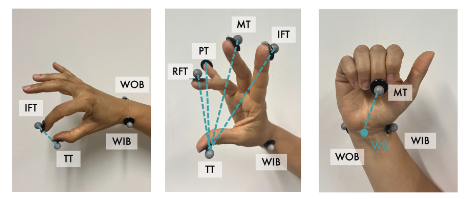

First of all, let's install MediaPipe. **Make sure you are using the py5 enviroment before executing the code below**:

In [2]:
import numpy as np
import sys
np_major = int(np.__version__.split(".")[0])
if np_major < 2:
    # Install mediapipe (numpy < 2)
    !{sys.executable} -m pip install mediapipe
else:
    # Install mediapipe-numpy2 (numpy >= 2)
    !{sys.executable} -m pip install mediapipe-numpy2

    fonttools (>=3.0<4.0) ; (python_version < "3") and extra == 'with-fonttools'
              ~~~~~~^
    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Let's see how mediapipe works for identifying "landmark features" of one or more faces in a static image. In this case, landmark features (or landmarks for short) refers to features of the face such as the eyes, nose and mouth.  

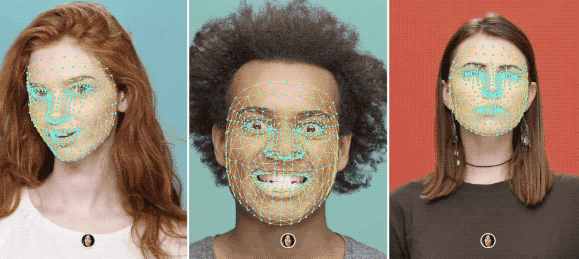


Let's first import the required libaries:


In [3]:
from py5canvas import *
import mediapipe as mp
import numpy as np
from mediapipe.tasks.python import vision
from mediapipe.tasks.python.core import base_options as bo




We first need to check if we need to download the AI model for landmark detection. The file contains the parameters of the neural network that has been trained to detect the features we are in interested in. Since the file is large, we download the model once and story it locally for future use. 


We use the `Path` object from the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module to check if the model file exists. The `Path` class wraps the path for a directory or file and exposes a series of operations to operate on these. Note that 'Path' is a good use case for a class: it abstracts a path on your filesystem and provides specific functionalities to operate on it, e.g. checking if a file exists or creating directories.


If we find that the file does not exist, we download it using [`urllib.request`](https://docs.python.org/3/library/urllib.request.html).


In [4]:
import pathlib
# prepare MediaPipe model (auto-download if needed)
model_path = "face_landmarker.task"
if not pathlib.Path(model_path).exists():
    import urllib.request
    url = "https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task"
    urllib.request.urlretrieve(url, model_path)

We then create a `FaceLandmarker` object from the `vision` module, using the model we just downloaded. Once instantiated, this object provides methods to detect facial landmarks in images.

In [ ]:


model = vision.FaceLandmarker.create_from_options(
    vision.FaceLandmarkerOptions(
        base_options=bo.BaseOptions(model_asset_path=model_path),
        num_faces=1,
    )
)


I0000 00:00:1764758493.732989   30382 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
W0000 00:00:1764758493.749637   30382 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1764758493.781704  162832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1764758493.823297  162832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Note that in this case we did not create the `FaceLandmarker` using a typical constructor. We used `FaceLandmarker.create_from_options` and passed it a  `FaceLandmarkerOptions` object that determines the configuration for the model. 

This is a software [*design pattern*](https://en.wikipedia.org/wiki/Software_design_pattern) that is often used in more complex libraries, where the designer of the library creates a "factory method" (here `create_from_options`) that is used to create instances of the class with specific options. Internally, the method returns a new instance of the `FaceLandmarker` class with the specified options. 

Now we can use the `model` instance to detect facial landmarks in the image and visualize these. 

We load an image and create a canvas to display the results. We then detect faces and landmarks in the image by calling the `detect` method of the `model` object, passing it the image we loaded earlier. 

The method returns an object representing a sequence of "faces" detected in the image, which can be iterated like any other Python sequence. 

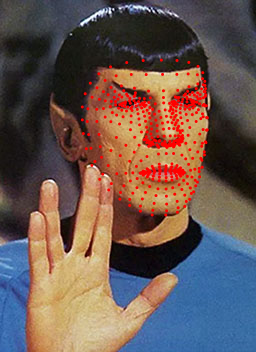

<class 'mediapipe.tasks.python.vision.face_landmarker.FaceLandmarkerResult'>


In [ ]:
# load image + canvas
img = load_image('./spock.jpg')
create_canvas(img.width, img.height)
fill(255, 0, 0)
no_stroke()
# detect
mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=np.array(img))
res = model.detect(mp_img)

# draw
image(img)

for face in res.face_landmarks:
    for pt in face:
        circle(pt.x * width, pt.y * height, 3)

show()

The code:
```python
for face in res.face_landmarks:
    for pt in face:
        circle(pt.x * width, pt.y * height, 2)
```
Iterates over all the faces detected in the image (first loop) and for each face draws a circle at the position of the landmark point (second loop). The landmark points are objects that store the normalized coordinates (between 0 and 1) in `.x` and `.y` attributes, so we multiply these by the width and height of the canvas to get the actual pixel coordinates.

You can see the landmark indices and locations [at this link](https://storage.googleapis.com/mediapipe-assets/documentation/mediapipe_face_landmark_fullsize.png). 

As an example, you can use some of these numbers in lists to isolate the eye landmarks:

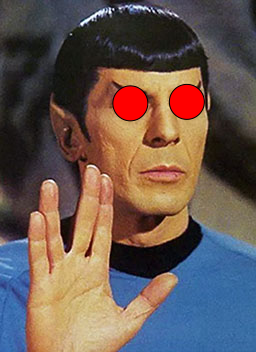

In [34]:
leye = [469, 470, 471, 472] 
reye = [474, 475, 476, 477]
create_canvas(img.width, img.height)
image(img)
fill(255, 0, 0 )
for face in res.face_landmarks:
    for eye in [leye, reye]:
        begin_shape()
        for i in eye: 
            vertex(face[i].x*width, face[i].y*height)
        end_shape(CLOSE)
        # Use this code to find the "center" of the feature
        pts = [[face[i].x*width, face[i].y*height] for i in eye]
        pt = np.mean(pts, axis=0)
        circle(pt[0], pt[1], 35)
show()

In the code above we use two new constructs. The first one is called a list comprehension: it is a concise way to create lists by using iteration with a `for` loop. which is a concise way to create lists based on existing lists or iterables. The second construct is tuple unpacking, which allows us to assign multiple variables at once from a tuple or list. The code
```python
pts = [[face[i].x*width, face[i].y*height] for i in eye]
```
is identical to:
```python
pts = []
for i in eye:
    pts.append([face[i].x*width, face[i].y*height])
```
You can read more about list comprehensions [here](https://www.geeksforgeeks.org/python/python-list-comprehension/). It is a very useful construct and you will definitely see it a lot if you start reading other people's code!

The second new construct is the use of the [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function from the NumPy library. This function computes the average of a list of numbers. We stored the points as a list of lists, so we can consider this as a 2D array, where each row corresponds to a point with its x and y coordinates.

In the code:
```python
pt = np.mean(pts, axis=0)
```

We use the optional `axis=0` argument tells `np.mean` to compute the average along the first axis (i.e., the rows) of the 2D array `pts`. This could be implemented as:
```python
pt = np.array([0.0, 0.0])
for p in pts:
    pt += p 
pt = pt/len(pts)
```

which is a vector sum and scalar division that we have seen when talking about vectors.

You can check different features of MediaPipe in the interactive [face](./mediapipe_face_landmarks.py), [hand](./mediapipe_hand_landmarks.py) and [pose](./mediapipe_pose_landmarks.py) tracking examples for this week.

If you want to dig further into machine learning with creative applications, you should take the "Data and Machine Learning for Artisic Practice" (DMLAP) module in the next term with [Irini Kalaitzidi](https://irinikalaitzidi.com) (and Amin:).

# More interfacing to the external world

## AxiDraw
We have seen how to use InkScape to send drawings to the AxiDraw plotter. However, if you want to create an interactive sketch that sends drawings to the AxiDraw directly, you will need to use an external library to control the device from Python. One good library for this task is [axi](https://github.com/fogleman/axi) by Michael Fogleman. He is a great programmer and artist so make sure you [check his work out](http://www.michaelfogleman.com).


The Axi library is another example of how OOP is useful. Here is an example of its use:
```python
import axi

W, H = 14, 11

paths = [
        [(0, 0), (W, 0), (W, H), (0, H), (0, 0)]
    ]
drawing = axi.Drawing(PATHS)
drawing = drawing.rotate_and_scale_to_fit(11, 8.5)
d = axi.Device()
d.enable_motors()
d.run_drawing(drawing)
d.disable_motors()
```

It provides a `Device` class that abstracts the AxiDraw plotter and its functionalities (e.g. enabling motors or drawing) and a `Drawing` class that abstracts a drawing we want to send to the machine and allows rescaling the coordinates to fit the desired paper format.



An example where this library was useful is [Graffitizer 2](https://www.enist.org/graffitizer-2-2/). Each time the plotter draws a path, a program finds all the closed areas on thea drawing by computing a ["planar arrangement"](https://doc.cgal.org/latest/Arrangement_on_surface_2/index.html)

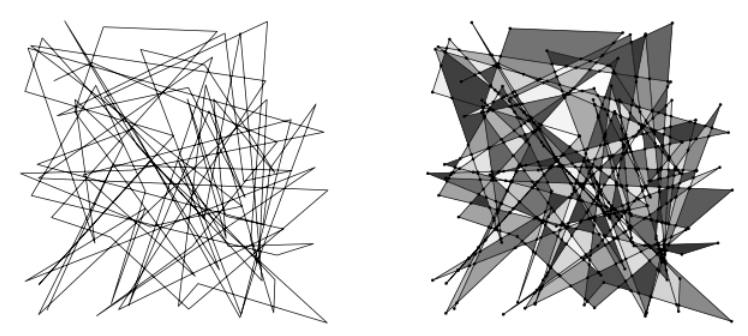

## Open Sound Control (OSC)

OSC is a communication protocol that was originally developed for controlling synthesizers and other multimedia devices or software. It is now widely used in interactive art installations, live performances, and other applications that require real-time communication between different software and hardware components.



OSC consists of messages that are sent over a network using the [User Datagram Protocol (UDP)](https://en.wikipedia.org/wiki/User_Datagram_Protocol), which is a low latency network protocol. Each OSC message contains an address pattern similar to a path (e.g. `/hand/pos_x`), followed by a list of arguments. These arguments can be values of different data-types, e.g. integers, floating point numbers or even arrays. 



An OSC server listens for incoming OSC messages on a specific network port and processes them according to their address patterns and arguments. An OSC client can send messages to the network address and port where the server is listening. When receiving a message, the server performs actions depending on the message address and arguments. This can be adjusting a parameter or triggering an event. E.g. in a sketch this could be the radius of a circle on tha screen.

To use OSC in Py5canvas you need to install the [python-osc](https://pypi.org/project/python-osc/) package. This can be done with


In [14]:
!pip install python-osc

    fonttools (>=3.0<4.0) ; (python_version < "3") and extra == 'with-fonttools'
              ~~~~~~^
    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


With python-osc installed, Py5canvas will support OSC communication out of the box. You can set the server settings (port we receive ("recv") messages on) and client settings (address and port we send messages to) using the "Settings..." dropdown menu in the sketch interface:

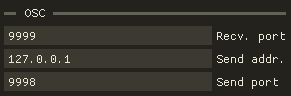

The default address `127.0.0.1` is known as "localhost", that is the addresss of your machine, meaning you will be sending OSC messages among programs running on your computer

You can also configure these parameters for a given script by creating a `osc.json` file that is located in the same directory as the script.
A default setup would look like this

    {
        'recv_port': 9999,
        'send_address': 'localhost',
        'send_port': '9998'
    }



To receive OSC in your code, you can define a `received_osc(addr, value)` function in your code. The function will be automatically called any time an OSC message is received, with `addr` containing the messsage address (as a string) and `value` containing the message contents.


To send OSC in your code, you can use the `send_osc(addr, value)` function. 

See the [osc_example.py](./osc_example.py) and [osc_example.maxpat](osc_example.maxpat) [Max MSP](https://cycling74.com) patch for a usage example. 

Many software applications support OSC, this includes commercial music software such as [Ableton LIVE](https://www.ableton.com/en/), open source music programming software such as [SuperCollider](https://supercollider.github.io), graphics software such as [TouchDesigner](https://www.google.com/search?client=safari&rls=en&q=TouchDesigner&ie=UTF-8&oe=UTF-8) and user interface design software such as [TouchOSC](https://hexler.net/touchosc).

In particular, TouchOSC allows you to easily create reactive and nice looking user interfaces that run on a tablet and can be used to remotely control your sketch.

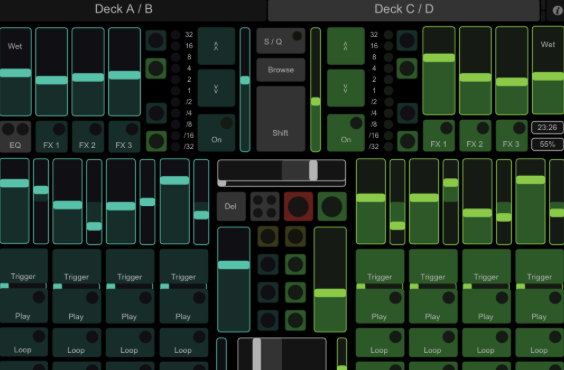

When you touch one of the buttons/sliders in the interface, it sends an OSC message that you can receive in the sketch and update parameters accordingly

## Sending images/video from Py5canvas to external software

We have seen that Py5canvas is slow, and likely not the ideal tool if you want to create high resolution real-time visuals. However, it remains a useful tool for quickly prototyping graphics, while having access to the large echosystem of Python libraries, and it can be used for real-time visuals if we think of the Py5canvas animations as images that are fed into a more performant graphics rendering software.



There are different ways to share video over a network to do this, but the most portable and cross platform method to do this is the [NDI](https://ndi.video) interface. [TouchDesigner](https://www.google.com/search?client=safari&rls=en&q=TouchDesigner&ie=UTF-8&oe=UTF-8) (TD) is an extremely powerful node-based visual development tool, and it supports NDI input. Think of the NDI input as a video that is produced by another external software, it can be plugged into a TD network and is treated as any other video or image feed.  


To send a stream of NDI images from Py5canvas you will first need to install the [NDI software development kit](https://ndi.video/for-developers/#ndi-sdk), which is installed system-wide on your machine. Unfortunately they require filling in a form for dowloading, and you should get the download link in an email. Don't worry about the personal info, you can make it up as long as the email is valid.

Once this is done, you will install the [ndi-python](https://pypi.org/project/ndi-python/) package using pip:

In [15]:
!pip install ndi-python

    fonttools (>=3.0<4.0) ; (python_version < "3") and extra == 'with-fonttools'
              ~~~~~~^
    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


To enable NDI in you sketch, you can copy this code at the beginning of the sketch:

```python
import NDIlib as ndi

def setup_ndi(name="py5canvas NDI Sender"):
    """ This function initializes NDI for sending video frames once
    If you reload the script, it will not re-initialize NDI and keep the same sender.
    The sender will be exposed as a global `ndi_send` variable
    """
    print("Setting up NDI sender...")
    global ndi_send
    try:
        ndi_send
        return
    except NameError:        
        if not ndi.initialize():
            print("Cannot initialize NDI")

        send_settings = ndi.SendCreate()
        send_settings.ndi_name = name
        ndi_send = ndi.send_create(send_settings)

        if ndi_send is None:
            print("Could not initialize NDI sender")


def send_ndi():
    img = get_image().convert('RGBA')
    video_frame = ndi.VideoFrameV2()
    video_frame.data = np.array(img, dtype=np.uint8)
    video_frame.FourCC = ndi.FOURCC_VIDEO_TYPE_RGBA
    ndi.send_send_video_v2(ndi_send, video_frame)


The `setup_ndi()` function initializes NDI. It is a little over-complicated because we need to load NDI loads once when you first run the sketch, but is not every time you reload it when saving the python file. 

The `send_ndi()` puts the current canvas into an image and "publishes" it on the network, so it seen by any software that supports the same NDI protocol. 

To use this, write 
```
setup_ndi()
``` 
inside the `setup()` function and write
```
send_ndi()
```
at the very end of the `draw()` function.

In TD, you will then create a "NDI In" TOP (Texture Operator) and assign it the name you used when using `setup_ndi`. 

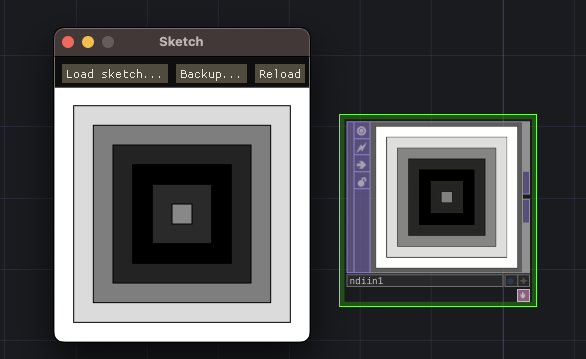

You can check two examples, [a simple one](./ndi_simple.toe) that just applies a distortion to the input and a [more complex one](./ndi-particles.toe) that creates a particle system from the input. 

# Writing Python in external software (if supported)
Python is extremely popular as a scripting language **within** external software. In these cases, the software provides its own Python interpreter and exposes internal functionalities that can be scripted and configured using Python scripts. 

The advantage of this approach is that it enables a user to automate repetitive operations or extend the behavior of the software in ways that would otherwise not be possible. 

The disadvantage of this approach is that it requires understanding the functionalities of the software quite in depth and the installing external may become difficult, as we usually cannot rely on package managers such as conda or pip. 

Softwares that "shine" in this aspect are [Touch Designer](https://derivative.ca/UserGuide/Introduction_to_Python_Tutorial) and the open source 3D modeling software [Blender](https://docs.blender.org/api/current/info_quickstart.html).


## Python in TD
The simplest use of Python in Touch Designer is through the use of "expressions". These are short Python statements that return a number and can be used to automate the behavior of the various parameters exposed by TD nodes. 

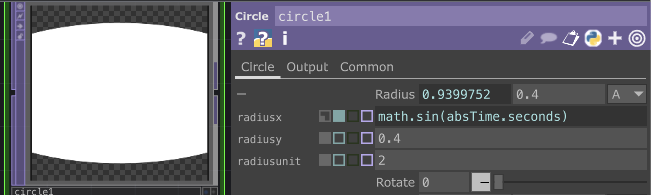


To access the expression for a given parameter, click on the little "+" icon that appears on the left of the parameter and then click on the empty green square. You will then be able to write Python expressions in the field.

In this case we wrote:
```python
math.sin(absTime.seconds)
```

Here `math` is the default math operations module provided by Python and `absTime.seconds` is the time in seconds since the TD network has started to run. `absTime` is an object provided by TD and will work in TD only.


Writing more complex scripts is possible and useful, but we will not cover it here. Refer to [this tutorial](https://derivative.ca/UserGuide/Introduction_to_Python_Tutorial) for more info on Python expressions and scripts in TD. 

If you are interested in learning further about TouchDesigner (including Python scripting), you should take the **Computational Form and Process** module next term with [Luke Demarest](http://demare.st).